<a href="https://colab.research.google.com/github/TheIndianCoder/Choose-the-best-Optimization-Algorithm-in-keras/blob/master/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Testing out the TPU connection

First, you'll need to enable TPUs for the notebook.

Navigate to Edit→Notebook Settings, and select TPU from the Hardware Accelerator drop-down (you can also access Notebook Settings via the command palette: cmd/ctrl-shift-P).

Next, we'll check that we can connect to the TPU.

In [0]:
import os
import pprint
import tensorflow as tf

if 'COLAB_TPU_ADDR' not in os.environ:
  print('ERROR: Not connected to a TPU runtime; please see the first cell in this notebook for instructions!')
else:
  tpu_address = 'grpc://' + os.environ['COLAB_TPU_ADDR']
  print ('TPU address is', tpu_address)

  with tf.Session(tpu_address) as session:
    devices = session.list_devices()
    
  print('TPU devices:')
  pprint.pprint(devices)

TPU address is grpc://10.29.174.18:8470
TPU devices:
[_DeviceAttributes(/job:tpu_worker/replica:0/task:0/device:CPU:0, CPU, -1, 7785293455442122011),
 _DeviceAttributes(/job:tpu_worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 17179869184, 13190166650812894607),
 _DeviceAttributes(/job:tpu_worker/replica:0/task:0/device:XLA_GPU:0, XLA_GPU, 17179869184, 246553068776425881),
 _DeviceAttributes(/job:tpu_worker/replica:0/task:0/device:TPU:0, TPU, 17179869184, 7267868606763189520),
 _DeviceAttributes(/job:tpu_worker/replica:0/task:0/device:TPU:1, TPU, 17179869184, 14648039416149543163),
 _DeviceAttributes(/job:tpu_worker/replica:0/task:0/device:TPU:2, TPU, 17179869184, 4751526088184924487),
 _DeviceAttributes(/job:tpu_worker/replica:0/task:0/device:TPU:3, TPU, 17179869184, 11849442231269886633),
 _DeviceAttributes(/job:tpu_worker/replica:0/task:0/device:TPU:4, TPU, 17179869184, 4520817293191812889),
 _DeviceAttributes(/job:tpu_worker/replica:0/task:0/device:TPU:5, TPU, 17179869184, 167862

If the cell above reports an error, make sure that you have enabled TPU support in the notebook settings. (Edit menu → Notebook settings)

Now, let's try a simple computation.

In [0]:
import numpy as np

def add_op(x, y):
  return x + y
  
x = tf.placeholder(tf.float32, [10,])
y = tf.placeholder(tf.float32, [10,])
tpu_ops = tf.contrib.tpu.rewrite(add_op, [x, y])
  
session = tf.Session(tpu_address)
try:
  print('Initializing...')
  session.run(tf.contrib.tpu.initialize_system())
  print('Running ops')
  print(session.run(tpu_ops, {x: np.arange(10), y: np.arange(10)}))
finally:
  # For now, TPU sessions must be shutdown separately from
  # closing the session.
  session.run(tf.contrib.tpu.shutdown_system())
  session.close()

Initializing...
Running ops
[array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14., 16., 18.], dtype=float32)]


# TPU FLOPs

Finally, we'll try a small test of floating point computations (floating point operations per seconds. (The units are FLOPS: floating point operations per second.)

Using TensorFlow backend.


170500096/170498071 [==============================] - 30s 0us/step


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:36: DeprecationWarning: `toimage` is deprecated!
`toimage` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use Pillow's ``Image.fromarray`` directly instead.


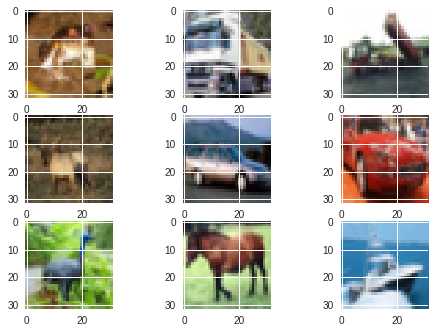

shapes: Xtrain  (20000, 3, 32, 32)  Y_train : (20000, 10)  Xtest  (2000, 3, 32, 32)  Y_test : (2000, 10)
Calling SGD with lr=  1e-05

Using SGD with alpha :  1e-05
Train on 20000 samples, validate on 2000 samples
Epoch 1/1
20000/20000 [==============================] - 7s 328us/step - loss: 2.3520 - acc: 0.1077 - val_loss: 2.3174 - val_acc: 0.1025
Accuracy: 10.25%
Calling SGD with lr=  0.0001

Using SGD with alpha :  0.0001
Train on 20000 samples, validate on 2000 samples
Epoch 1/1
20000/20000 [==============================] - 4s 192us/step - loss: 2.2946 - acc: 0.1256 - val_loss: 2.2750 - val_acc: 0.1565
Accuracy: 15.65%
Calling SGD with lr=  0.001

Using SGD with alpha :  0.001
Train on 20000 samples, validate on 2000 samples
Epoch 1/1
20000/20000 [==============================] - 4s 193us/step - loss: 2.2142 - acc: 0.1738 - val_loss: 2.0843 - val_acc: 0.2855
Accuracy: 28.55%
Calling SGD with lr=  0.001

Using SGD with alpha :  0.001
Train on 20000 samples, validate on 2000 samples

In [0]:
# -*- coding: utf-8 -*-
"""
Created on Wed Dec  5 09:45:29 2018

@author: AMY
"""
import pandas as pd
import numpy
import keras
import matplotlib.pyplot as plt
from scipy import stats
import tensorflow as tf
from pylab import rcParams
from sklearn.model_selection import train_test_split
#from "C:\Users\AMY\Desktop\Algo project" import cifar10 as cifar10
from matplotlib import pyplot
from scipy.misc import toimage

from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras import optimizers
from keras.optimizers import SGD
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
import time
# load data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
# create a grid of 3x3 images
for i in range(0, 9):
	pyplot.subplot(330 + 1 + i)
	pyplot.imshow(toimage(X_train[i]))
# show the plot
pyplot.show()
# Simple CNN model for CIFAR-10

K.set_image_dim_ordering('th')
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

# load data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
# normalize inputs from 0-255 to 0.0-1.0
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]
#Reshaaping the 50,000 examples to 4096 for train and 500 for test
X_train=X_train[0:20000,:,:,:]
y_train=y_train[0:20000,:]
X_test=X_test[0:2000,:,:,:]
y_test=y_test[0:2000,:]
print("shapes: Xtrain ",X_train.shape," Y_train :",y_train.shape," Xtest ",X_test.shape," Y_test :",y_test.shape)
# Create the model
def ConvModel_SGD(alpha=0.01,epochs=1,loss_fun='categorical_crossentropy'):
    print("\nUsing SGD with alpha : ",alpha)
    start=time.time()
    model = Sequential()
    model.add(Conv2D(32, (3, 3), input_shape=(3, 32, 32), padding='same', activation='relu', kernel_constraint=maxnorm(3)))
    model.add(Dropout(0.2))
    model.add(Conv2D(32, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3)))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    # Compile model
    
    lrate = alpha
    decay = lrate/epochs
    sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
    #print(model.summary())
    # Fit the model
    hist=model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=128)
    # Final evaluation of the model
    scores = model.evaluate(X_test, y_test, verbose=0)
    end=time.time()
    print("Accuracy: %.2f%%" % (scores[1]*100))
    return [scores[1]*100,(end-start),hist]

def ConvModel_RMS(alpha=0.01,epochs=1,loss_fun='categorical_crossentropy'):
    print("\nUsing RMS with alpha : ",alpha)
    start=time.time()
    RMS=keras.optimizers.RMSprop
    model = Sequential()
    model.add(Conv2D(32, (3, 3), input_shape=(3, 32, 32), padding='same', activation='relu', kernel_constraint=maxnorm(3)))
    model.add(Dropout(0.2))
    model.add(Conv2D(32, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3)))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    # Compile model
    
    lrate = alpha
    decay = lrate/epochs
    rms=RMS(lr=lrate,decay=decay)
    model.compile(loss='categorical_crossentropy', optimizer=rms, metrics=['accuracy'])
   # print(model.summary())
    # Fit the model
    hist=model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=128)
    # Final evaluation of the model
    scores = model.evaluate(X_test, y_test, verbose=0)
    end=time.time()
    print("Accuracy: %.2f%%" % (scores[1]*100))
    return [scores[1]*100,(end-start),hist]

def ConvModel_ADAGrad(alpha=0.01,epochs=1):
    print("\nUsing ADAGrad with alpha : ",alpha)
    start=time.time()
    ADAGRAD=keras.optimizers.Adagrad
    model = Sequential()
    model.add(Conv2D(32, (3, 3), input_shape=(3, 32, 32), padding='same', activation='relu', kernel_constraint=maxnorm(3)))
    model.add(Dropout(0.2))
    model.add(Conv2D(32, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3)))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    # Compile model
    
    lrate = alpha
    decay = lrate/epochs
    ADA=ADAGRAD(lr=lrate,decay=decay)
    model.compile(loss='categorical_crossentropy', optimizer=ADA, metrics=['accuracy'])
   # print(model.summary())
    # Fit the model
    hist=model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=128)
    # Final evaluation of the model
    scores = model.evaluate(X_test, y_test, verbose=0)
    print("Accuracy: %.2f%%" % (scores[1]*100))
    #print("Scores shape :",scores.shape)
    end=time.time()
    return [scores[1]*100,(end-start),hist]

def ConvModel_ADADelta(alpha=0.01,epochs=1):
    print("\nUsing ADDelta with alpha : ",alpha)
    start=time.time()
    ADADEL=keras.optimizers.Adadelta
    model = Sequential()
    model.add(Conv2D(32, (3, 3), input_shape=(3, 32, 32), padding='same', activation='relu', kernel_constraint=maxnorm(3)))
    model.add(Dropout(0.2))
    model.add(Conv2D(32, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3)))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    # Compile model
    
    lrate = alpha
    decay = lrate/epochs
    ADADEL=ADADEL(lr=lrate,decay=decay)
    model.compile(loss='categorical_crossentropy', optimizer=ADADEL, metrics=['accuracy'])
    #print(model.summary())
    # Fit the model
    hist=model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=128)
    # Final evaluation of the model
    scores = model.evaluate(X_test, y_test, verbose=0)
    print("Accuracy: %.2f%%" % (scores[1]*100))
    end=time.time()
    return [scores[1]*100,(end-start),hist]
#ConvModel_ADADelta()
def ConvModel_ADAM(alpha=0.01,epochs=1):
    print("\nUsing ADAM with alpha : ",alpha)
    start=time.time()
    ADAM=optimizers.Adam
    model = Sequential()
    model.add(Conv2D(32, (3, 3), input_shape=(3, 32, 32), padding='same', activation='relu', kernel_constraint=maxnorm(3)))
    model.add(Dropout(0.2))
    model.add(Conv2D(32, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3)))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    
    # Compile model
    
    lrate = alpha
    decay = lrate/epochs
    ADAM=ADAM(lr=lrate,decay=decay)
    model.compile(loss='categorical_crossentropy', optimizer=ADAM, metrics=['accuracy'])
    #print(model.summary())
    # Fit the model
    hist=model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=128)
    # Final evaluation of the model
    scores = model.evaluate(X_test, y_test, verbose=0)
    print("Accuracy: %.2f%%" % (scores[1]*100))
    end=time.time()
    return [scores[1]*100,(end-start),hist]
#ConvModel_ADAM()

def ConvModel_ADAMAX(alpha=0.01,epochs=1):
    

    # 1. Authenticate and create the PyDrive client.
    auth.authenticate_user()
    gauth = GoogleAuth()
    gauth.credentials = GoogleCredentials.get_application_default()
    drive = GoogleDrive(gauth)

    # 2. Save Keras Model or weights on google drive

    # create on Colab directory
    model.save('model.h5')    
    model_file = drive.CreateFile({'title' : 'model.h5'})
    model_file.SetContentFile('model.h5')
    model_file.Upload()

    # download to google drive
    drive.CreateFile({'id': model_file.get('id')})
    print("\nUsing ADAMAX with alpha : ",alpha)
    start=time.time()
    ADAMAX=keras.optimizers.Adamax
    model = Sequential()
    model.add(Conv2D(32, (3, 3), input_shape=(3, 32, 32), padding='same', activation='relu', kernel_constraint=maxnorm(3)))
    model.add(Dropout(0.2))
    model.add(Conv2D(32, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3)))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    # Compile model
    
    lrate = alpha
    decay = lrate/epochs
    ADAMAX=ADAMAX(lr=lrate,decay=decay)
    model.compile(loss='categorical_crossentropy', optimizer=ADAMAX, metrics=['accuracy'])
    #print(model.summary())
    # Fit the model
    hist=model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=128)
    # Final evaluation of the model
    scores = model.evaluate(X_test, y_test, verbose=0)
    print("Accuracy: %.2f%%" % (scores[1]*100))
    end=time.time()
    return [scores[1]*100,(end-start),hist]
  
  #ConvModel_ADAMAX()
def ConvModel_NADAM(alpha=0.01,epochs=1):
    print("\nUsing NADAM with alpha : ",alpha)
    start=time.time()
    NADAM=optimizers.Nadam
    model = Sequential()
    model.add(Conv2D(32, (3, 3), input_shape=(3, 32, 32), padding='same', activation='relu', kernel_constraint=maxnorm(3)))
    model.add(Dropout(0.2))
    model.add(Conv2D(32, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3)))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    # Compile model
    
    lrate = alpha
    NADAM=NADAM(lr=lrate)
    model.compile(loss='categorical_crossentropy', optimizer=NADAM, metrics=['accuracy'])
   # print(model.summary())
    # Fit the model
    hist=model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=128)
    # Final evaluation of the model
    scores = model.evaluate(X_test, y_test, verbose=0)
    print("Accuracy: %.2f%%" % (scores[1]*100))
    end=time.time()
    return [scores[1]*100,(end-start),hist]
def CompareAlgos_alpha():
    lr_list=[0.00001,0.0001,0.001,0.001,0.01,0.1,1,10]
    
    result_lr_list={'SGD':[0,0],'NADAM':[0,0],'ADAMAX':[0,0],'RMS':[0,0],'ADAM':[0,0],'ADAGrad':[0,0],'ADADelta':[0,0]}
    for i in lr_list:
        print("Calling SGD with lr= ",i)
        [acc,time_spent,_]=ConvModel_SGD(alpha=i)
        if(result_lr_list['SGD'][0]<(100*acc-time_spent)):
            result_lr_list['SGD'][0]=100*acc-time_spent
            result_lr_list['SGD'][1]=i
    
    for i in lr_list:
        print("Calling RMS with lr= ",i)
        [acc,time_spent,_]=ConvModel_RMS(alpha=i)
        if(result_lr_list['RMS'][0]<(100*acc-time_spent)):
            result_lr_list['RMS'][0]=100*acc-time_spent
            result_lr_list['RMS'][1]=i
   
    for i in lr_list:
        print("Calling ADAGrad with lr= ",i)
        [acc,time_spent,_]=ConvModel_ADAGrad(alpha=i)
        if(result_lr_list['ADAGrad'][0]<(100*acc-time_spent)):
            result_lr_list['ADAGrad'][0]=100*acc-time_spent
            result_lr_list['ADAGrad'][1]=i

    for i in lr_list:
        print("Calling ADADelta with lr= ",i)
        [acc,time_spent,_]=ConvModel_ADADelta(alpha=i)
        if(result_lr_list['ADADelta'][0]<(100*acc-time_spent)):
            result_lr_list['ADADelta'][0]=100*acc-time_spent
            result_lr_list['ADADelta'][1]=i
            
    for i in lr_list:
        print("Calling ADAM with lr= ",i)
        [acc,time_spent,_]=ConvModel_ADAM(alpha=i)
        if(result_lr_list['ADAM'][0]<(100*acc-time_spent)):
            result_lr_list['ADAM'][0]=100*acc-time_spent
            result_lr_list['ADAM'][1]=i
    
    for i in lr_list:
        print("Calling ADAMAX with lr= ",i)
        [acc,time_spent,_]=ConvModel_ADAMAX(alpha=i)
        if(result_lr_list['ADAMAX'][0]<(100*acc-time_spent)):
            result_lr_list['ADAMAX'][0]=100*acc-time_spent
            result_lr_list['ADAMAX'][1]=i
    
    for i in lr_list:
        print("Calling NADAM with lr= ",i)
        [acc,time_spent,_]=ConvModel_NADAM(alpha=i)
        if(result_lr_list['NADAM'][0]<(100*acc-time_spent)):
            result_lr_list['NADAM'][0]=100*acc-time_spent
            result_lr_list['NADAM'][1]=i
    print(result_lr_list)
    return result_lr_list
ans=CompareAlgos_alpha()
print(ans)

In [0]:
def ConvModel_ADAMAX(alpha=0.01,epochs=1):
    print("\nUsing ADAMAX with alpha : ",alpha)
    start=time.time()
    ADAMAX=keras.optimizers.Adamax
    model = Sequential()
    model.add(Conv2D(32, (3, 3), input_shape=(3, 32, 32), padding='same', activation='relu', kernel_constraint=maxnorm(3)))
    model.add(Dropout(0.2))
    model.add(Conv2D(32, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3)))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    # Compile model
    
    lrate = alpha
    decay = lrate/epochs
    ADAMAX=ADAMAX(lr=lrate,decay=decay)
    model.compile(loss='categorical_crossentropy', optimizer=ADAMAX, metrics=['accuracy'])
    #print(model.summary())
    # Fit the model
    hist=model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=128)
    # Final evaluation of the model
    scores = model.evaluate(X_test, y_test, verbose=0)
    print("Accuracy: %.2f%%" % (scores[1]*100))
    end=time.time()
    return [scores[1]*100,(end-start),hist]
  
  
def CompareAlgos_main(result_dict):
    result=result_dict
    result_algos={'SGD':[0,0],'NADAM':[0,0],'ADAMAX':[0,0],'RMS':[0,0],'ADAM':[0,0],'ADAGrad':[0,0],'ADADelta':[0,0]}
    temp=ConvModel_ADAMAX(result['ADAMAX'][1],epochs=50)
    result_algos['ADAMAX'][0]=temp[0]
    result_algos['ADAMAX'][1]=temp[1]
    result_algos['ADAMAX'].append(temp[2])

    temp=ConvModel_SGD(result['SGD'][1],epochs=50)
    result_algos['SGD'][0]=temp[0]
    result_algos['SGD'][1]=temp[1]
    result_algos['SGD'].append(temp[2])
    
    temp=ConvModel_RMS(result['RMS'][1],epochs=50)
    result_algos['RMS'][0]=temp[0]
    result_algos['RMS'][1]=temp[1]
    result_algos['RMS'].append(temp[2])
    
    temp=ConvModel_ADAM(result['ADAM'][1],epochs=50)
    result_algos['ADAM'][0]=temp[0]
    result_algos['ADAM'][1]=temp[1]
    result_algos['ADAM'].append(temp[2])
    
    temp=ConvModel_ADAGrad(result['ADAGrad'][1],epochs=50)
    result_algos['ADAGrad'][0]=temp[0]
    result_algos['ADAGrad'][1]=temp[1]
    result_algos['ADAGrad'].append(temp[2])
    
    temp=ConvModel_ADADelta(result['ADADelta'][1],epochs=50)
    result_algos['ADADelta'][0]=temp[0]
    result_algos['ADADelta'][1]=temp[1]
    result_algos['ADADelta'].append(temp[2])
    
    temp=ConvModel_NADAM(result['NADAM'][1],epochs=50)
    result_algos['NADAM'][0]=temp[0]
    result_algos['NADAM'][1]=temp[1]
    result_algos['NADAM'].append(temp[2])
    
    
    print("\n\nThe accuracy order is ")
    for i in sorted(result_algos.items(),key=lambda kv:kv[1][0],reverse=True):
       print(i[0]," :" ,i[1][0])
    
    print("\n\n\nThe time order is ")
    for i in sorted(result_algos.items(),key=lambda kv:kv[1][1],reverse=True):
       print(i[0]," :" ,i[1][1]) 
    
    return result_algos
result_algo=CompareAlgos_main(ans)


Using ADAMAX with alpha :  0.001
Train on 20000 samples, validate on 2000 samples
Epoch 1/50
20000/20000 [==============================] - 11s 527us/step - loss: 1.8841 - acc: 0.3180 - val_loss: 1.6485 - val_acc: 0.4265
Epoch 2/50
20000/20000 [==============================] - 4s 201us/step - loss: 1.5916 - acc: 0.4293 - val_loss: 1.5323 - val_acc: 0.4555
Epoch 3/50
20000/20000 [==============================] - 4s 200us/step - loss: 1.4802 - acc: 0.4679 - val_loss: 1.4394 - val_acc: 0.5000
Epoch 4/50
20000/20000 [==============================] - 4s 199us/step - loss: 1.3867 - acc: 0.5060 - val_loss: 1.3588 - val_acc: 0.5190
Epoch 5/50
20000/20000 [==============================] - 4s 200us/step - loss: 1.3096 - acc: 0.5340 - val_loss: 1.2769 - val_acc: 0.5585
Epoch 6/50
20000/20000 [==============================] - 4s 198us/step - loss: 1.2423 - acc: 0.5618 - val_loss: 1.2512 - val_acc: 0.5675
Epoch 7/50
20000/20000 [==============================] - 4s 200us/step - loss: 1.1808 -

# Next steps

More involved examples include:
- [Shakespeare in 5 minutes with Cloud TPUs and Keras](https://colab.research.google.com/github/tensorflow/tpu/blob/master/tools/colab/shakespeare_with_tpu_and_keras.ipynb)
- [Shakespeare in 5 minutes with Cloud TPUs via TPUEstimator](https://colab.research.google.com/github/tensorflow/tpu/blob/master/tools/colab/shakespeare_with_tpuestimator.ipynb)
- [Fashion MNIST with Keras and TPUs](https://colab.research.google.com/github/tensorflow/tpu/blob/master/tools/colab/fashion_mnist.ipynb)

We'll be sharing more examples of TPU use in Colab over time, so be sure to check back for additional example links, or [follow us on Twitter @GoogleColab](https://twitter.com/googlecolab).

Meanwhile, you can check out the [TPUEstimator documentation on TensorFlow.org](https://www.tensorflow.org/api_docs/python/tf/contrib/tpu/TPUEstimator). TPUEstimator is an easy way to update models to take advantage of TPU acceleration.

In [0]:
result_algo

{'ADADelta': [47.099999999999994,
  228.17400288581848,
 'ADAGrad': [66.85,
  202.35287976264954,
 'ADAM': [63.9,
  221.1261866092682,
 'ADAMAX': [66.35,
  206.9465456008911,
 'NADAM': [65.45,
  238.79333305358887,
 'RMS': [66.05,
  204.33440136909485,
 'SGD': [64.1, 183.6719512939453, <keras.callbacks.History at 0x7fd4f2b6c908>]}

In [0]:
hist_ADADelta=result_algo['ADADelta'][2]
print(hist_ADADelta.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


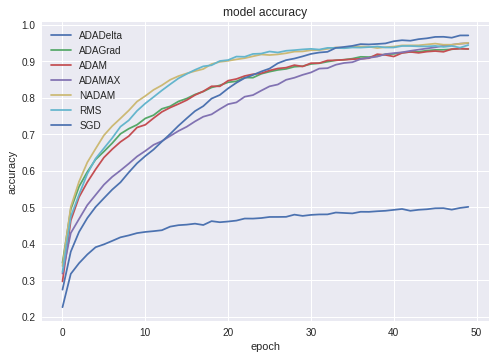

In [0]:
hist_ADAGrad=result_algo['ADAGrad'][2]
hist_ADAM=result_algo['ADAM'][2]
hist_ADAMAX=result_algo['ADAMAX'][2]
hist_NADAM=result_algo['NADAM'][2]
hist_RMS=result_algo['RMS'][2]
hist_SGD=result_algo['SGD'][2]


plt.plot(hist_ADADelta.history['acc'])
#plt.plot(hist_ADADelta.history['val_acc'])
plt.plot(hist_ADAGrad.history['acc'])
plt.plot(hist_ADAM.history['acc'])
plt.plot(hist_ADAMAX.history['acc'])
plt.plot(hist_NADAM.history['acc'])
plt.plot(hist_RMS.history['acc'])
plt.plot(hist_SGD.history['acc'])


#plt.plot(hist_ADAGrad.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['ADADelta', 'ADAGrad','ADAM','ADAMAX','NADAM','RMS','SGD'], loc='upper left')
plt.show()

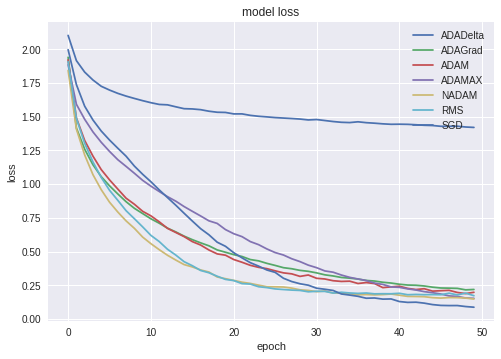

In [0]:
plt.plot(hist_ADADelta.history['loss'])
#plt.plot(hist_ADADelta.history['val_acc'])
plt.plot(hist_ADAGrad.history['loss'])
plt.plot(hist_ADAM.history['loss'])
plt.plot(hist_ADAMAX.history['loss'])
plt.plot(hist_NADAM.history['loss'])
plt.plot(hist_RMS.history['loss'])
plt.plot(hist_SGD.history['loss'])


#plt.plot(hist_ADAGrad.history['val_acc'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['ADADelta', 'ADAGrad','ADAM','ADAMAX','NADAM','RMS','SGD'], loc='upper right')
plt.show()

In [0]:
alpha=0.001
epochs=50
print("\nUsing RMS with alpha : ",alpha)
start=time.time()
RMS=keras.optimizers.RMSprop
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(3, 32, 32), padding='same', activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
# Compile model

lrate = alpha
decay = lrate/epochs
rms=RMS(lr=lrate,decay=decay)
model.compile(loss='categorical_crossentropy', optimizer=rms, metrics=['accuracy'])
# print(model.summary())
# Fit the model
hist=model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=128)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
end=time.time()
print("Accuracy: %.2f%%" % (scores[1]*100))



Using RMS with alpha :  0.001
Train on 20000 samples, validate on 2000 samples
Epoch 1/50
20000/20000 [==============================] - 11s 559us/step - loss: 1.9065 - acc: 0.3303 - val_loss: 1.6990 - val_acc: 0.3825
Epoch 2/50
20000/20000 [==============================] - 4s 198us/step - loss: 1.4505 - acc: 0.4841 - val_loss: 1.4406 - val_acc: 0.4575
Epoch 3/50
20000/20000 [==============================] - 4s 198us/step - loss: 1.2540 - acc: 0.5594 - val_loss: 1.1627 - val_acc: 0.5930
Epoch 4/50
20000/20000 [==============================] - 4s 198us/step - loss: 1.1136 - acc: 0.6094 - val_loss: 1.1470 - val_acc: 0.6055
Epoch 5/50
20000/20000 [==============================] - 4s 198us/step - loss: 0.9984 - acc: 0.6529 - val_loss: 1.1088 - val_acc: 0.6255
Epoch 6/50
20000/20000 [==============================] - 4s 198us/step - loss: 0.9098 - acc: 0.6836 - val_loss: 1.2235 - val_acc: 0.5855
Epoch 7/50
20000/20000 [==============================] - 4s 198us/step - loss: 0.8314 - ac

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `toimage` is deprecated!
`toimage` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use Pillow's ``Image.fromarray`` directly instead.
  This is separate from the ipykernel package so we can avoid doing imports until


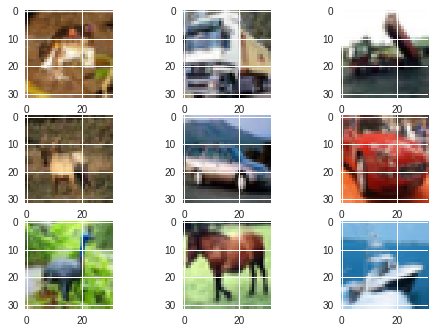

In [0]:
for i in range(0, 9):
	pyplot.subplot(330 + 1 + i)
	pyplot.imshow(toimage(X_train[i]))
# show the plot
pyplot.show()


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `toimage` is deprecated!
`toimage` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use Pillow's ``Image.fromarray`` directly instead.
  This is separate from the ipykernel package so we can avoid doing imports until


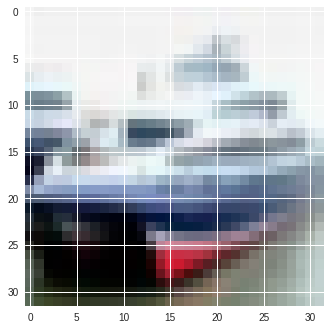

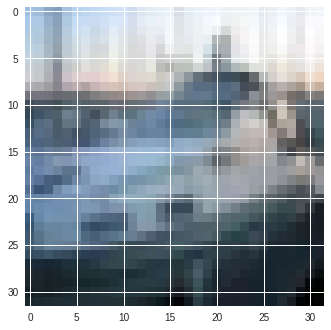

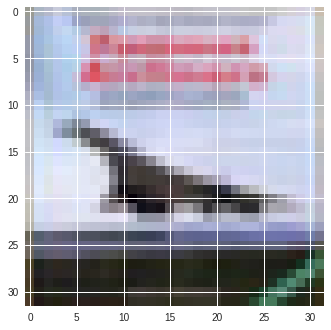

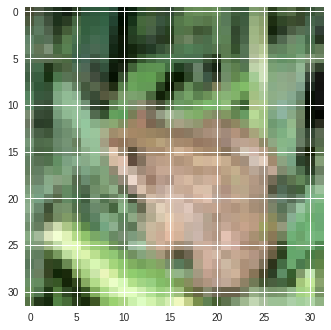

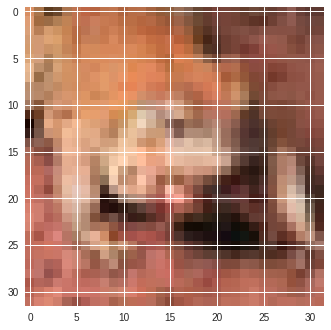

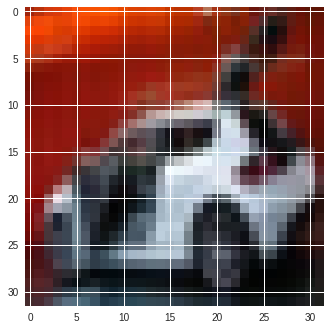

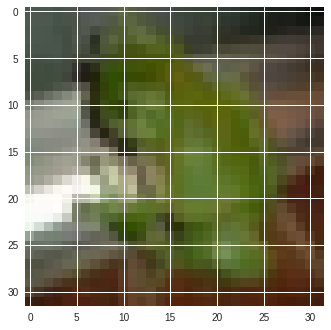

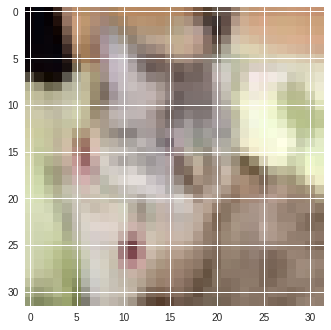

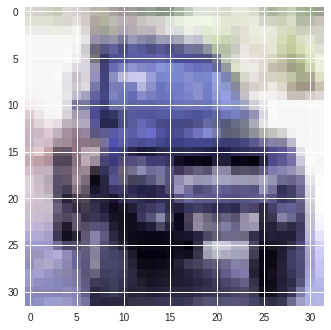

ships
ships
ships
frogs
frogs
cars
frogs
cats


In [0]:
dat=['airplanes', 'cars', 'birds', 'cats', 'deer', 'dogs', 'frogs', 'horses', 'ships', 'trucks']
for i in range(1,10):
    pyplot.imshow(toimage(X_test[i]))
    pyplot.show()
    ar=model.predict(X_test[0:i,:,:,:])
for i in range(1,9):
  j=numpy.argmax(ar[i])
  print(dat[j])